<br><br><br><br><br><br><br><br><br><br><br><br>

<h1 style="text-align: center;">MACD ve Süpertrend Al-Sat Sinyalleri</h1>

# Projenin amacı : 


<p>
finansal piyasalarda otomatik alım-satım sinyalleri üretmek için aşağıdaki teknik analiz indikatörlerini kullanarak bir ticaret stratejisi geliştirmektir:
</p>
<ol>
    <li><strong>Süpertrend</strong></li>
    <li><strong>MACD (Hareketli Ortalama Yakınsama Iraksama)</strong></li>
    <li><strong>Hareketli Ortalama</strong></li>
</ol>
<p>
Proje, belirli şartların karşılanması durumunda alım ve satım sinyalleri üreterek yatırımcılara potansiyel kâr fırsatları sunmayı hedeflemektedir:
</p>
<ul>
    <li><strong style="color:green">Alış Sinyali</strong>: Kapanış fiyatı hareketli 25 günlük ortalamasının üzerinde, MACD göstergesi MACD sinyal çizgisinin üzerinde ve kapanış fiyatı alt banttan yüksek olduğunda alış sinyali üretilir.</li>
    <li><strong style="color:red">Satış Sinyali</strong>: Kapanış fiyatı alt banttan düşük, MACD göstergesi MACD sinyal çizgisinin altında ve kapanış fiyatı hareketli 25 günlük ortalamasının altında olduğunda satış sinyali üretilir.</li>
</ul>
<p>
Özellikle, kapanış fiyatının belirli hareketli ortalamaların üzerinde veya altında olması, MACD ile sinyal hattının kesişim durumları ve Süpertrend'in destek veya direnç seviyelerinin kullanılması yoluyla piyasa eğilimlerinin belirlenmesi amaçlanmıştır.
</p>


<h3>geliştiren  : Hüseyin Erol</h3>

Kişisel websitem : https://huseyineroll.com/

Github : https://github.com/HuseyinErol24

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta

In [96]:
veri = yf.download("BTC-USD",start="2018-01-01") #BTC-USD verisi

[*********************100%%**********************]  1 of 1 completed


In [97]:
veri.head() #ilk 5 veri

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
2018-01-05,15477.200195,17705.199219,15202.799805,17429.500000,17429.500000,23840899072


In [98]:
veri.tail() #son 5 veri

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-01,62673.605469,63777.226562,62495.511719,62851.980469,62851.980469,25468379421
2024-07-02,62844.410156,63203.359375,61752.746094,62029.015625,62029.015625,20151616992
2024-07-03,62034.332031,62187.703125,59419.386719,60173.921875,60173.921875,29756701685
2024-07-04,60147.136719,60399.675781,56777.804688,56977.703125,56977.703125,41149609230
2024-07-05,57022.808594,57400.679688,53717.375000,55089.054688,55089.054688,53731196928


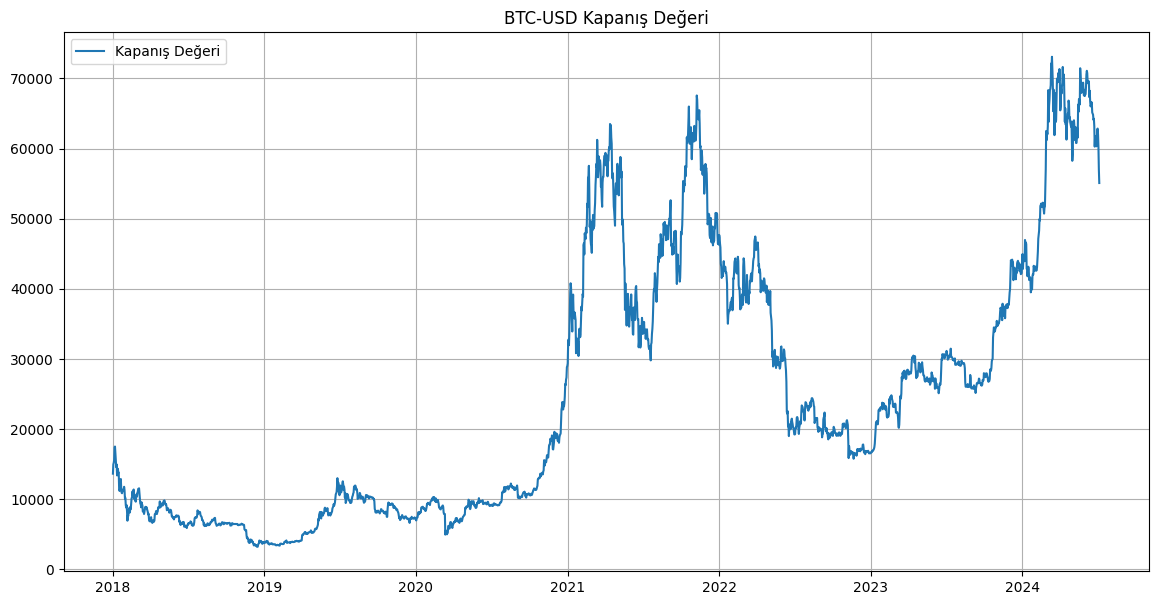

In [99]:
plt.figure(figsize=(14,7))
plt.title("BTC-USD Kapanış Değeri")
plt.plot(veri["Close"],label="Kapanış Değeri")
plt.grid()
plt.legend()

<br><br><br><br><br><br>

# MACD İndikatörü

<p>Macd İndikatörü kullandım çünkü : piyasa trendlerini, dönüm noktalarını ve alım-satım sinyallerini daha güvenilir ve etkili bir şekilde belirlememizi sağlıyor bu indikatör. Bu sayede doğru zamanda alım-satım yaparak potansiyel kâr fırsatlarını maksimize edebiliriz.</p>

In [100]:
veri["haraketli12"] = veri["Close"].ewm(span=12,adjust=False).mean()
veri["haraketli26"] = veri["Close"].ewm(span=26,adjust=False).mean()
veri["Macd"] = veri["haraketli12"]-veri["haraketli26"]
#12 haraketli ortalma ile 26 haraketli ortalamayı çıkartıyoruz
veri["Macd_dönüm_noktası"] = np.where((veri["Macd"] > veri["Macd"].shift(1)) & (veri["Macd"] > veri["Macd"].shift(-1)), 1, 0)
veri["Macd_dönüm_noktası1"] = np.where((veri["Macd"] < veri["Macd"].shift(1)) & (veri["Macd"] < veri["Macd"].shift(-1)), 1, 0)
#bir elaman hem bir ilersinden hem bir gerisinden büyükse orası tepe noktasıdır
#bunun tam terside dip noktasıdır 
veri["Macd_sinyal"] = veri["Macd"].ewm(span=9,adjust=False).mean()

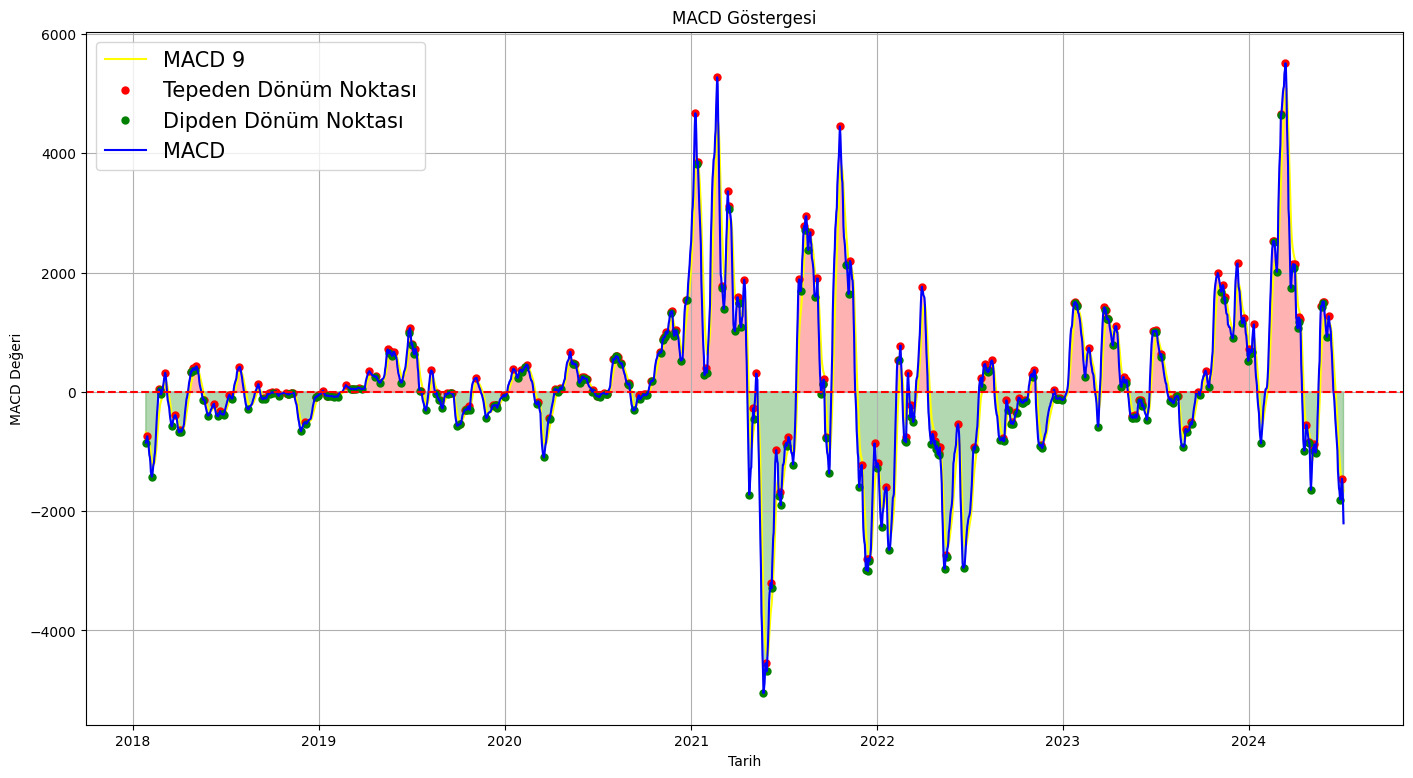

In [114]:
plt.figure(figsize=(17,9))
plt.plot(veri["Macd_sinyal"],color="yellow",label="MACD 9")
plt.plot(veri.loc[veri["Macd_dönüm_noktası"]==1]["Macd"],"o",
         color="red",markersize=5,label="Tepeden Dönüm Noktası")
plt.plot(veri.loc[veri["Macd_dönüm_noktası1"]==1]["Macd"],"o",
         color="green",markersize=5,label="Dipden Dönüm Noktası")
plt.plot(veri["Macd"], label='MACD', color='blue')
plt.axhline(0, color="red", linestyle='--')
plt.title('MACD Göstergesi')
plt.xlabel('Tarih')
plt.ylabel('MACD Değeri')
plt.fill_between(veri.index, 0, veri["Macd"], where=(veri["Macd"]>0),
               color='red', alpha=0.3)
plt.fill_between(veri.index, 0, veri["Macd"], where=(veri["Macd"]<0),
                 color='green', alpha=0.3)
plt.grid()
plt.legend(fontsize=15)

<br><br><br><br><br><br>

# Haraketli Ortalama

<p>Hareketli ortalama, belirli bir zaman dilimindeki verilerin ortalamasını alarak, zaman serisindeki dalgalanmaları düzleştiren bir tekniktir. Bu, trendleri daha belirgin hale getirir ve rastgele dalgalanmaların etkisini azaltır.</p>

In [102]:
veri["Haraketli25"] = veri["Close"].rolling(window=25).mean()

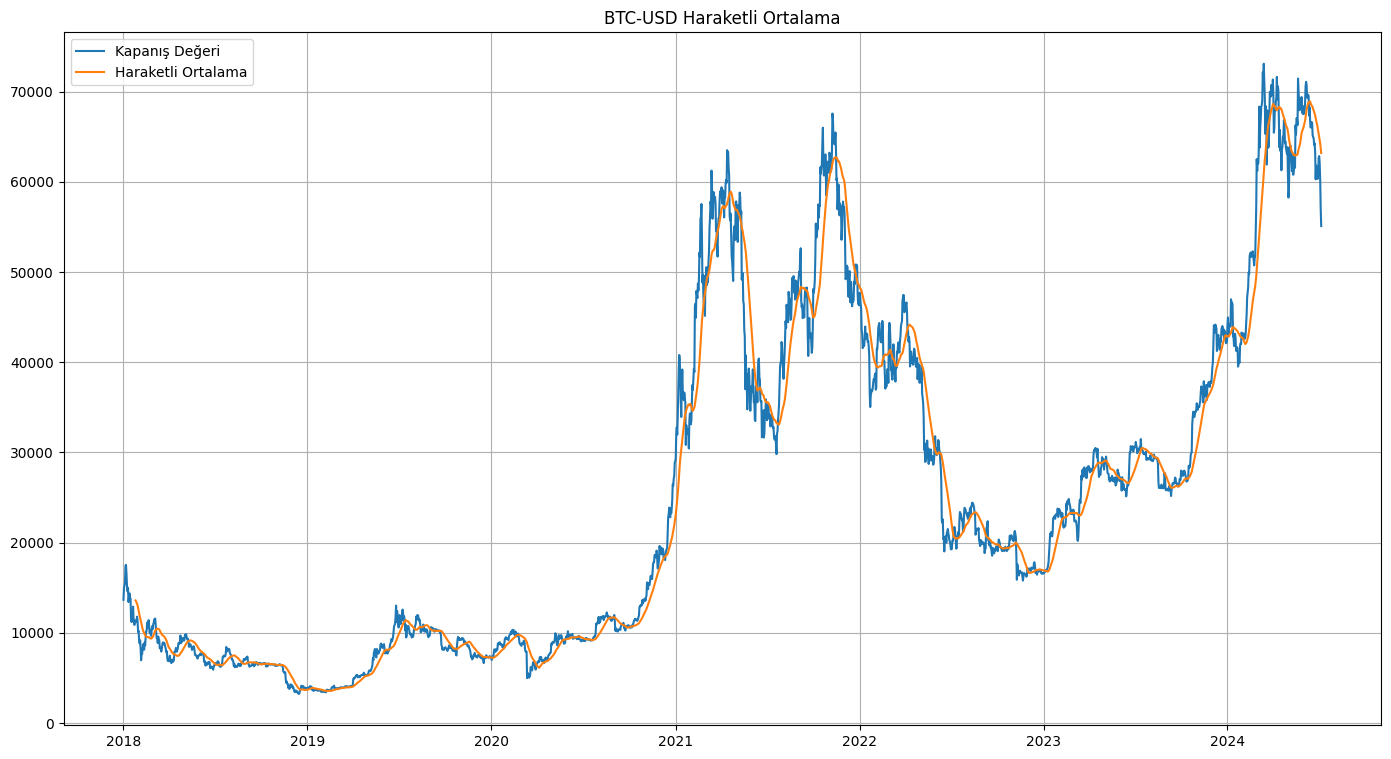

In [103]:
plt.figure(figsize=(17,9))
plt.title("BTC-USD Haraketli Ortalama")
plt.plot(veri["Close"],label="Kapanış Değeri")
plt.plot(veri["Haraketli25"],label="Haraketli Ortalama")
plt.grid()
plt.legend()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Super Trend

<p>Süpertrend indikatörü, fiyat hareketlerini takip eden ve piyasanın yukarı veya aşağı yönlü trendde olup olmadığını gösteren bir trend takip indikatörüdür. Bu indikatör, belirli bir dönem boyunca fiyatın üstünde veya altında hareket eden bantlar oluşturur ve bu bantlar sayesinde alım veya satım sinyalleri üretir.</p>

In [104]:
def super_trend_hesapla(veri,sensitivity=3, atr_period=14, multiplier=1):
    indikatör = veri.copy()
    indikatör["ATR"] = ta.atr(indikatör["High"],indikatör["Low"],indikatör["Close"],atr_period=atr_period)
    indikatör['nLoss'] = sensitivity*indikatör['ATR']
    indikatör.reset_index(drop=True, inplace=True)
    indikatör['ATRTrailing'] = np.nan
    for i in range(1, len(indikatör)):
        if (indikatör.loc[i,'Close'] > indikatör.loc[i-1,'ATRTrailing']) and (indikatör.loc[i-1,'Close'] > indikatör.loc[i-1, 'ATRTrailing']):
            indikatör.loc[i,'ATRTrailing'] = max(indikatör.loc[i-1,'ATRTrailing'], indikatör.loc[i,'Close'] - indikatör.loc[i,'nLoss'])
        elif (indikatör.loc[i,'Close'] < indikatör.loc[i-1,'ATRTrailing']) and (indikatör.loc[i-1,'Close'] < indikatör.loc[i - 1,'ATRTrailing']):
            indikatör.loc[i, 'ATRTrailing'] = min(indikatör.loc[i-1, 'ATRTrailing'], indikatör.loc[i,'Close'] + indikatör.loc[i,'nLoss'])
        elif indikatör.loc[i, 'Close'] > indikatör.loc[i-1,'ATRTrailing']:
            indikatör.loc[i, 'ATRTrailing'] = indikatör.loc[i,'Close'] - indikatör.loc[i,'nLoss']
        else:
            indikatör.loc[i,'ATRTrailing'] = indikatör.loc[i,'Close'] + indikatör.loc[i,'nLoss']  
    indikatör['üst_bant'] = indikatör['ATRTrailing'] + multiplier * indikatör['ATR']
    indikatör['alt_bant'] = indikatör['ATRTrailing'] - multiplier * indikatör['ATR']
    return indikatör

In [105]:
kayıt = super_trend_hesapla(veri)
kayıt["Tarihler"] = veri.index
kayıt.set_index("Tarihler",inplace=True)
kayıt.dropna(inplace=True)
veri = kayıt

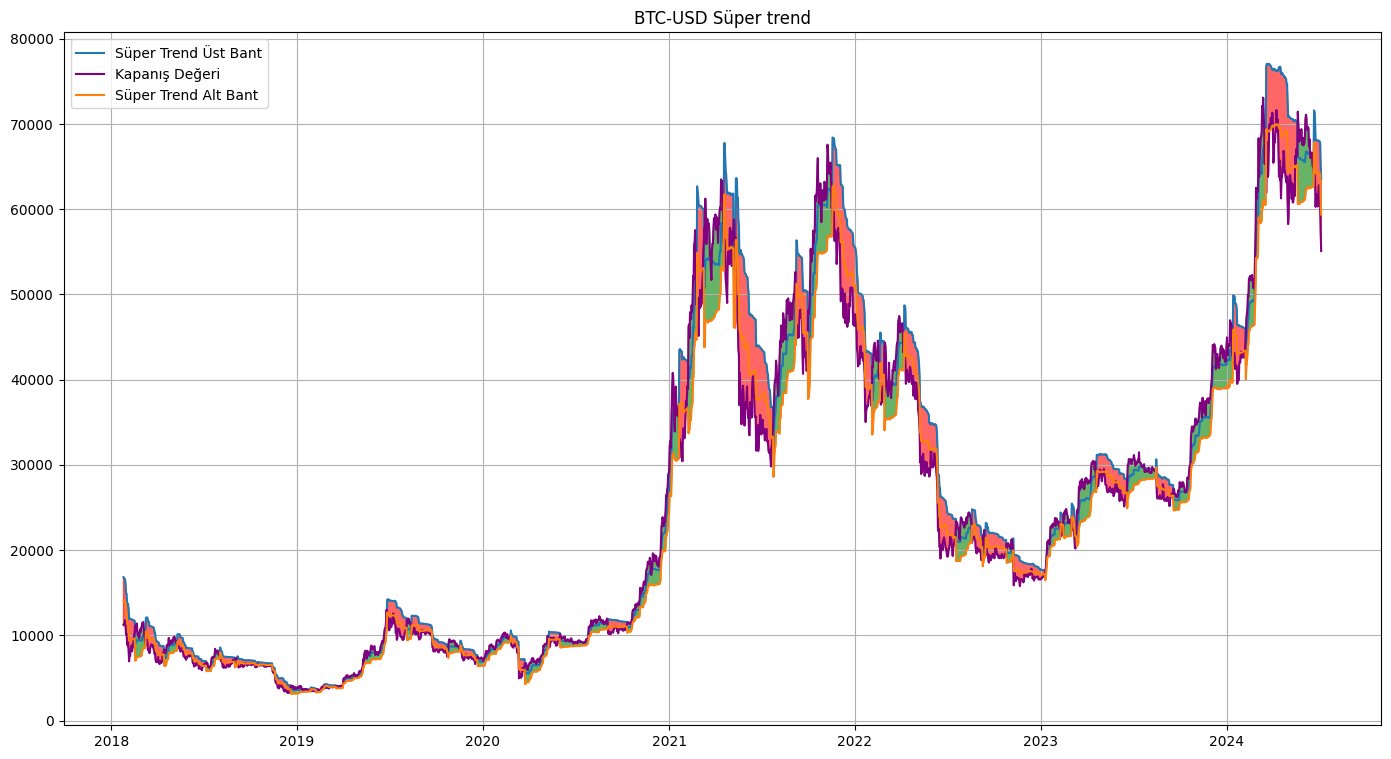

In [106]:
gecici_veri = veri.loc[veri.index>pd.to_datetime("2021-01-01")]
plt.figure(figsize=(17,9))
plt.title("BTC-USD Süper trend")
plt.plot(veri["üst_bant"],label="Süper Trend Üst Bant")
plt.plot(veri["Close"],label="Kapanış Değeri",color="purple")
plt.plot(kayıt["alt_bant"],label="Süper Trend Alt Bant")
plt.fill_between(veri.index, kayıt["Close"], veri["üst_bant"], 
                 where=(veri["üst_bant"] > veri["Close"]), color="red", alpha=0.6)
plt.fill_between(veri.index, kayıt["Close"], veri["alt_bant"], 
                 where=(veri["Close"] > veri["alt_bant"]), color="green", alpha=0.6)
plt.legend()
plt.grid()

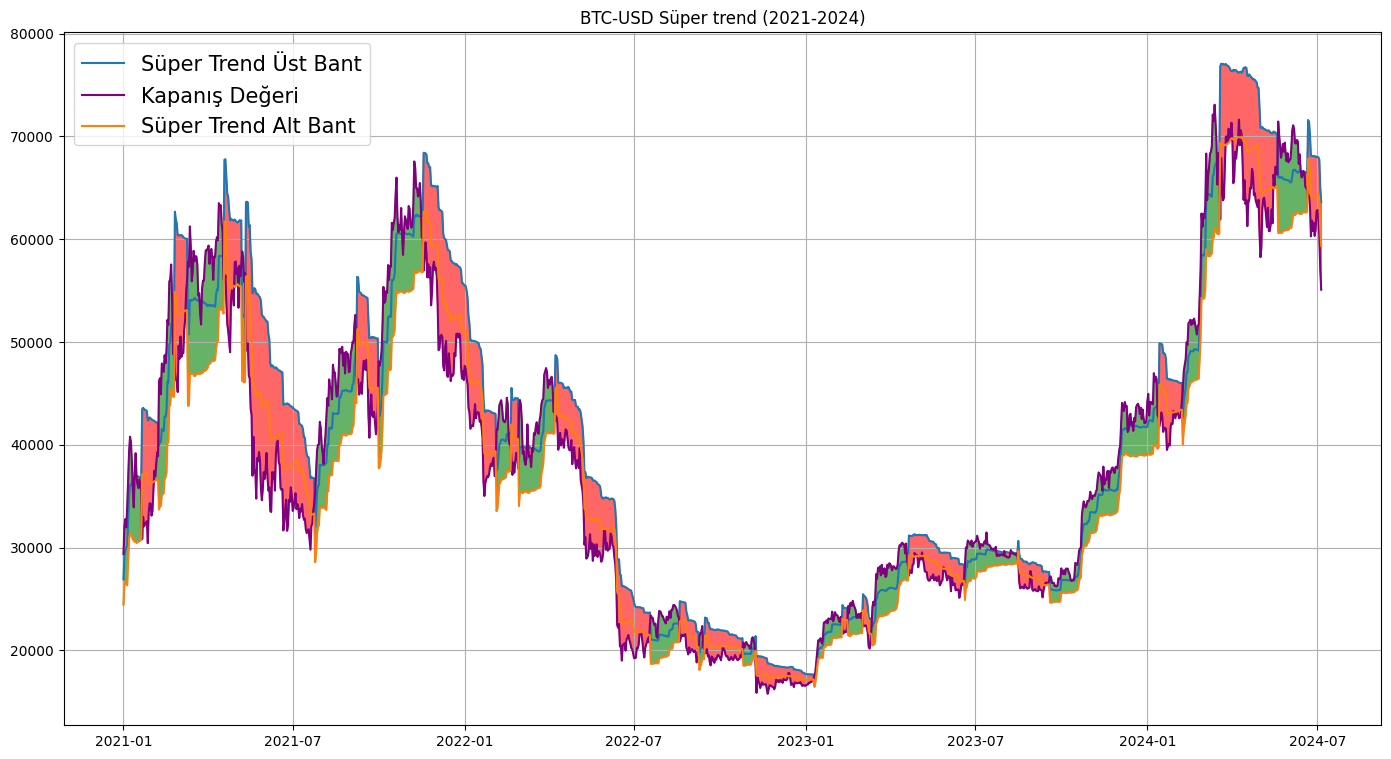

In [107]:
gecici_veri = veri.loc[(veri.index >= pd.to_datetime("2021-01-01"))]
plt.figure(figsize=(17,9))
plt.title("BTC-USD Süper trend (2021-2024)")
plt.plot(gecici_veri["üst_bant"], label="Süper Trend Üst Bant")
plt.plot(gecici_veri["Close"], label="Kapanış Değeri", color="purple")
plt.plot(gecici_veri["alt_bant"], label="Süper Trend Alt Bant")
plt.fill_between(gecici_veri.index, gecici_veri["Close"], gecici_veri["üst_bant"], 
                 where=(gecici_veri["üst_bant"] > gecici_veri["Close"]), color="red", alpha=0.6)
plt.fill_between(gecici_veri.index, gecici_veri["Close"], gecici_veri["alt_bant"], 
                 where=(gecici_veri["Close"] > gecici_veri["alt_bant"]), color="green", alpha=0.6)
plt.legend(fontsize=15)
plt.grid()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Supertrend, MACD ve Hareketli Ortalama İndikatörlerini Bileştirelim

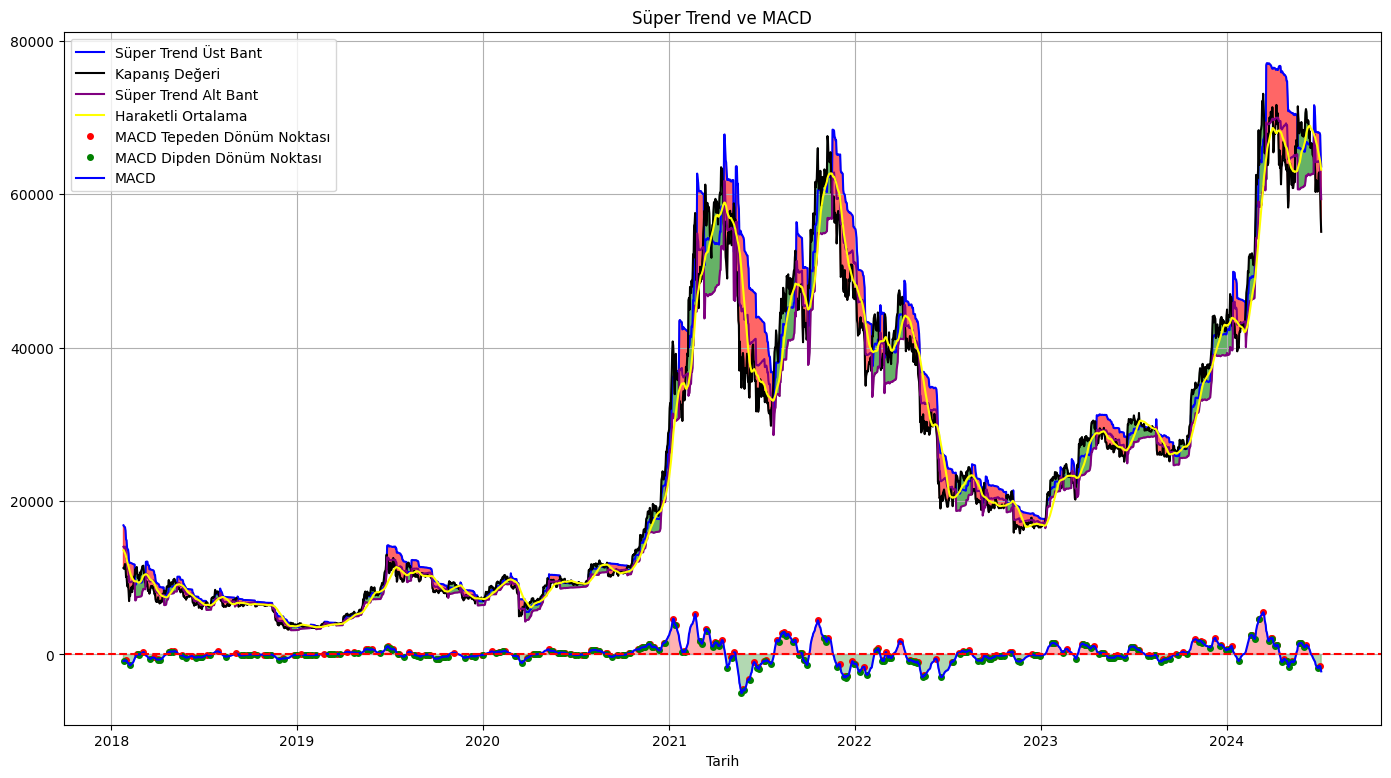

In [108]:
plt.figure(figsize=(17,9))
plt.title("Süper Trend ve MACD")
plt.plot(veri["üst_bant"], label="Süper Trend Üst Bant", color='blue')
plt.plot(veri["Close"], label="Kapanış Değeri", color='black')
plt.plot(veri["alt_bant"], label="Süper Trend Alt Bant", color='purple')
plt.fill_between(veri.index, kayıt["Close"], veri["üst_bant"], where=(veri["üst_bant"] > veri["Close"]), color="red", alpha=0.6)
plt.fill_between(veri.index, kayıt["Close"], veri["alt_bant"], where=(veri["Close"] > veri["alt_bant"]), color="green", alpha=0.6)
plt.plot(veri["Haraketli25"],color="yellow",label="Haraketli Ortalama")
plt.plot(veri.loc[veri["Macd_dönüm_noktası"]==1]["Macd"],"o",
         color="red",markersize=4,label="MACD Tepeden Dönüm Noktası")
plt.plot(veri.loc[veri["Macd_dönüm_noktası1"]==1]["Macd"],"o",
         color="green",markersize=4,label="MACD Dipden Dönüm Noktası")
plt.plot(veri["Macd"], label='MACD', color='blue')
plt.axhline(0, color="red", linestyle='--')
plt.xlabel('Tarih')
plt.fill_between(veri.index, 0, veri["Macd"], where=(veri["Macd"]>0),
                 interpolate=True, color='red', alpha=0.3)
plt.fill_between(veri.index, 0, veri["Macd"], where=(veri["Macd"]<0),
                 interpolate=True, color='green', alpha=0.3)

plt.legend()
plt.grid()

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Alış ve Satış Sinyalleri Koşulları

In [109]:
veri["Al_Sinyali"] = np.where(((veri["Close"]>veri["Haraketli25"]) & 
                              (veri["Macd"]>veri["Macd_sinyal"])  &
                              (veri["Close"]>veri["alt_bant"])),1,0)

veri["Sat_sinyali"] = np.where(((veri["Close"]<veri["alt_bant"]) &
                               (veri["Macd"]<veri["Macd_sinyal"]) &
                               (veri["Close"]<veri["Haraketli25"])),1,0)
veri["Al_Sinyali"] = veri["Al_Sinyali"].diff()
veri["Sat_sinyali"] = veri["Sat_sinyali"].diff()

<p>
    <strong style="color:green">Alış Sinyali:</strong> Kapanış fiyatı hareketli 25 günlük ortalamasının üzerinde, MACD göstergesi MACD sinyal çizgisinin üzerinde ve kapanış fiyatı alt banttan yüksek olduğunda alış sinyali üretilir.
</p>
<p>
    <strong style="color:red">Satış Sinyali:</strong> Kapanış fiyatı alt banttan düşük, MACD göstergesi MACD sinyal çizgisinin altında ve kapanış fiyatı hareketli 25 günlük ortalamasının altında olduğunda satış sinyali üretilir.
</p>


In [110]:
veri.dropna(inplace=True)

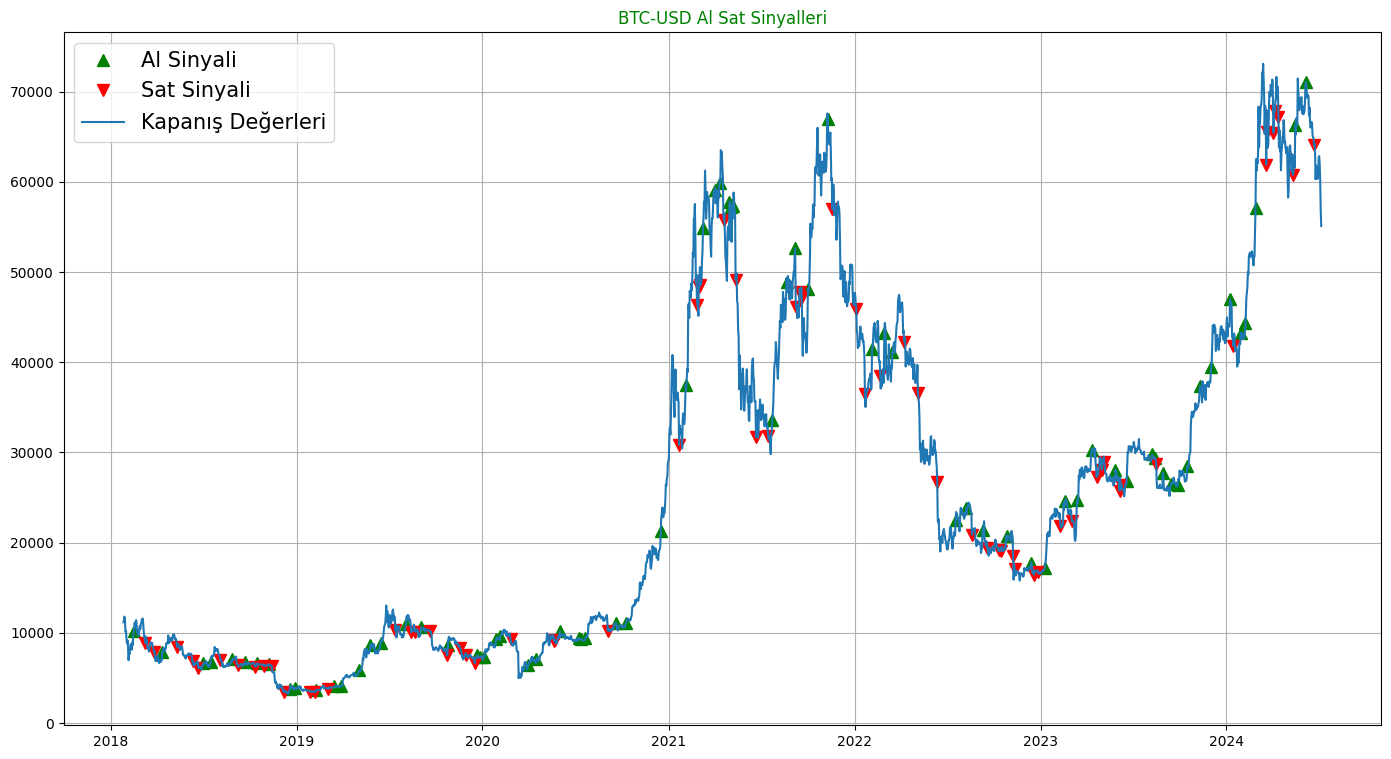

In [111]:
plt.figure(figsize=(17,9))
plt.title("BTC-USD Al Sat Sinyalleri",color="green")
plt.plot(veri.loc[veri["Al_Sinyali"]==1]["Close"],"^",color="green",markersize=9,label="Al Sinyali")
plt.plot(veri.loc[veri["Sat_sinyali"]==1]["Close"],"v",color="red",markersize=9,label="Sat Sinyali")
plt.plot(veri["Close"],label="Kapanış Değerleri")
plt.grid()
plt.legend(fontsize=15)

In [ ]:
entries = veri["Al_Sinyali"] == 1
exits = veri["Sat_sinyali"] == 1
portfolio = vbt.Portfolio.from_signals(
    veri["Close"], 
    entries, 
    exits,init_cash=1000,
    fees=0.001)
portfolio_stats = portfolio.stats()
print(portfolio_stats)
portfolio.plot().show()

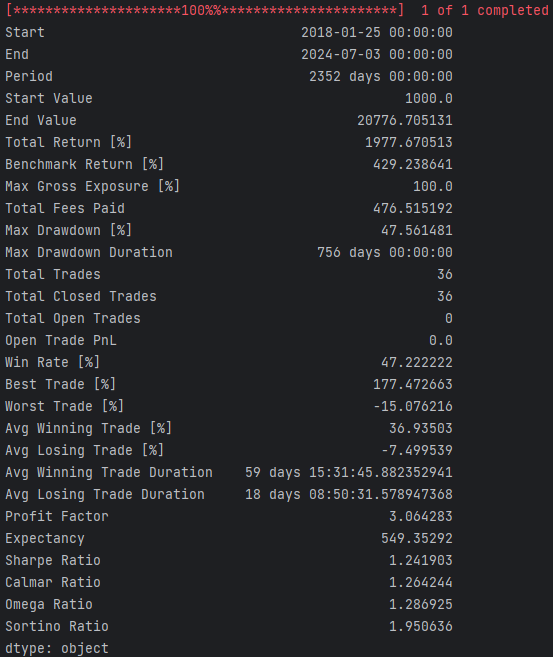

<h3>Başlangıç adımında paramız : 1000</h3>
<h3>Stratejinin sonunda paramız : 20776.705131</h3>

<h3>Geçen Süre 2352 gün</h3>


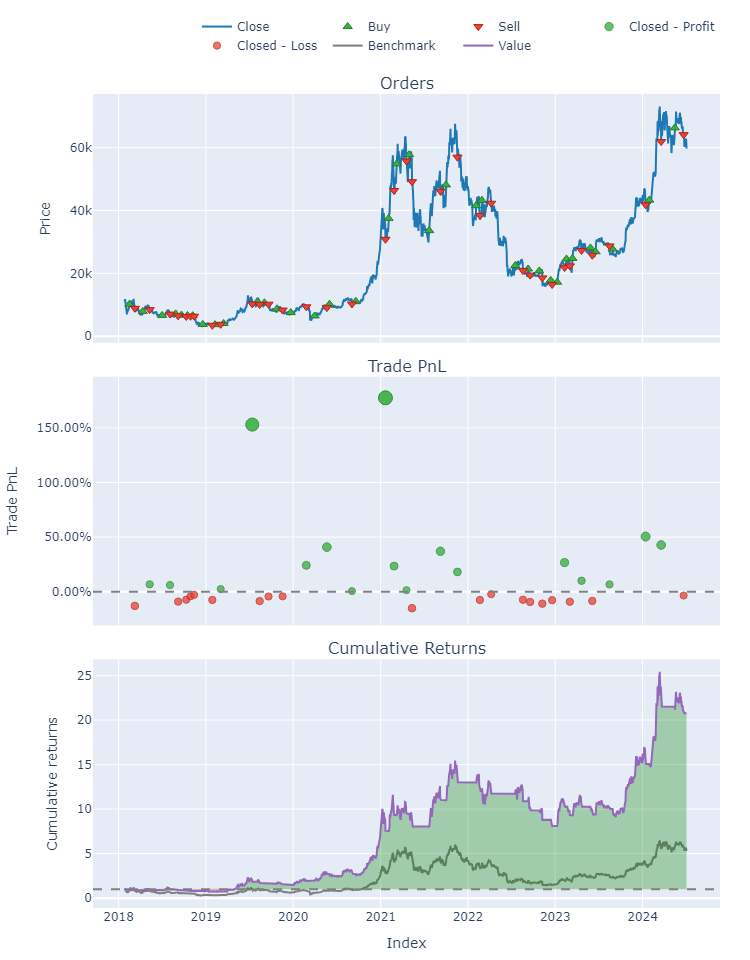

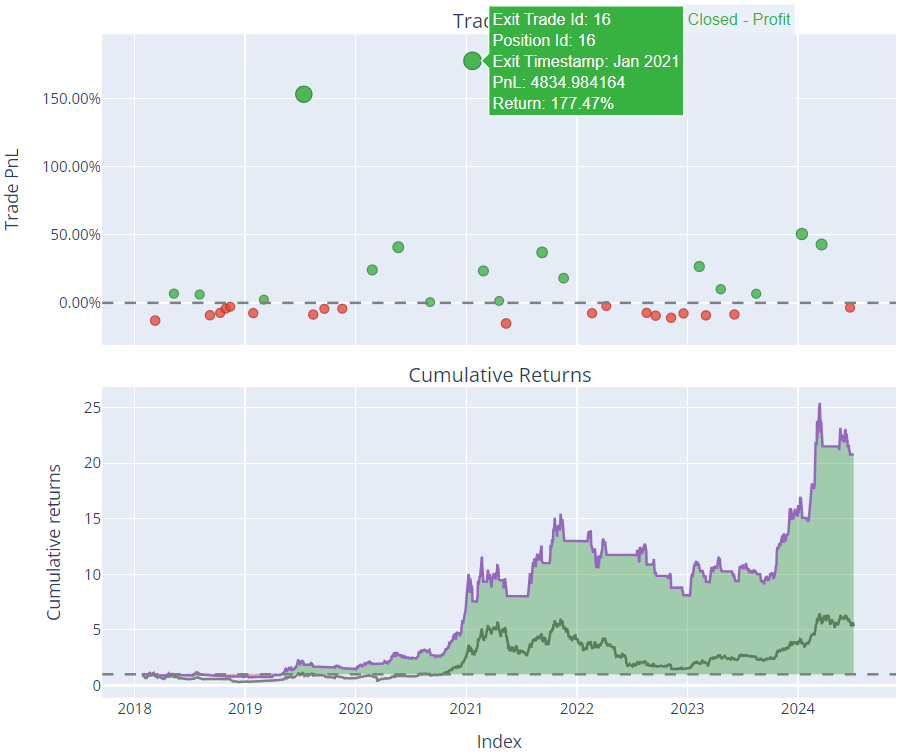

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

# Özet :

<h2>Kümülatif Getiri Eğrisine Bakarak</h2>
<p>Strateji, hem yükselen hem de düşen piyasalarda karlı olmuştur. Grafikte, piyasanın hem yukarı yönlü hareket ettiği dönemler hem de düşüş gösterdiği zamanlar görülebilmektedir. Bu durum, stratejimin her iki piyasa koşulunda da başarılı olduğunu göstermektedir.</p>




<body>
<h1>Stratejinin Performans Özeti (2018-2024)</h1>
<h2>Başlangıç ve Bitiş Değerleri</h2>
<p><strong>Başlangıç Değeri:</strong> <span style="color:red;">1000.0</span></p>
<p><strong>Bitiş Değeri:</strong> <span style="color:green;">20776.705131</span></p>

<h2>Toplam Getiri</h2>
<p><strong>Toplam Getiri [%]:</strong> <strong>1977.67</strong></p>
<p><strong>Benchmark Getiri [%]:</strong> 429.24</p>
<p>Strateji, piyasa ölçütüne kıyasla <span style="color:green;"><strong>çok daha yüksek bir getiri</strong></span> sağlamıştır.</p>

<h2>Maksimum Çekilme ve Süresi</h2>
<p><strong>Maksimum Çekilme [%]:</strong> 47.56</p>
<p><strong>Maksimum Çekilme Süresi:</strong> 756 gün</p>
<p>Her ne kadar <span style="color:red;"><strong>maksimum çekilme</strong></span> %47.56 olsa da, strateji uzun vadede başarılı olmuştur.</p>



<h2>En İyi ve En Kötü İşlemler</h2>
<p><strong>En İyi İşlem [%]:</strong> 177.47</p>
<p><strong>En Kötü İşlem [%]:</strong> <span style="color:red;">-15.08</span></p>
<p>En iyi işlem, <span style="color:green;"><strong>%177.47</strong></span> getiri sağlamıştır.</p>

<h2>Ortalama İşlem Performansları</h2>
<p><strong>Ortalama Kazanan İşlem [%]:</strong> <span style="color:green;">36.94</span></p>
<p><strong>Ortalama Kaybeden İşlem [%]:</strong> <span style="color:red;">-7.50</span></p>
<p>Kazanan işlemlerin ortalama getirisi <span style="color:green;"><strong>%36.94</strong></span> iken, kaybeden işlemlerin ortalama kaybı sadece <span style="color:red;"><strong>%7.50</strong></span> olmuştur.</p>

<h2>Risk ve Getiri Metrikleri</h2>
<p><strong>Sharpe Oranı:</strong> 1.24</p>
<p><strong>Calmar Oranı:</strong> 1.26</p>
<p><strong>Omega Oranı:</strong> 1.29</p>
<p><strong>Sortino Oranı:</strong> 1.95</p>
<p>Bu metrikler, stratejinin <span style="color:green;"><strong>risk ayarlı getirisinin yüksek</strong></span> olduğunu ve olumsuz sapmalara karşı <span style="color:green;"><strong>iyi koruma sağladığını</strong></span> göstermektedir.</p>
</body>
